In [1]:
# Standard librariees
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

#Statistics
from scipy import stats

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Libraries for time series analysis
import os
import sys

import pandas_datareader.data as web

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as smtools
import scipy.stats as scs
from arch import arch_model

In [3]:
import statsmodels.api as sm

In [4]:
df = pd.read_stata('homes.dta')

In [5]:
df.head()

,homes,irate
0,676,8.43
1,639,8.76
2,554,8.94
3,546,8.85
4,554,8.67


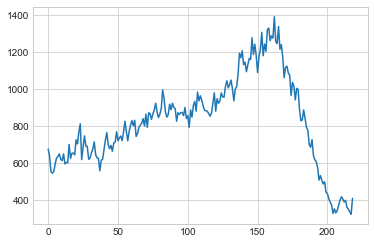

In [6]:
df['homes'].plot() 

plt.show()

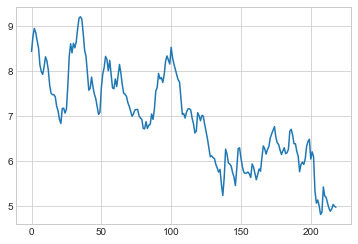

In [7]:
df['irate'].plot() 
plt.show()

In [8]:
#Create data index
ts = pd.period_range(start = '1.1.1992',end = '3.1.2010', freq='M')
df['Date'] = ts
df.set_index('Date',inplace=True)

In [9]:
#Implement the test for our simulated data
from statsmodels.tsa.stattools import adfuller

In [10]:
result = adfuller(df['homes'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.227023
p-value: 0.904818
Critical Values:
	1%: -4.003
	5%: -3.432
	10%: -3.140


In [11]:
df['dhomes'] = df['homes'].diff(periods=1)
df['dirate'] = df['irate'].diff(periods=1)
df.dropna(inplace=True)


In [12]:
df.parse_dates=[0]

C:\Users\Marta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


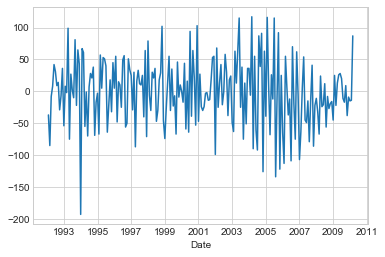

In [13]:
df['dhomes'].plot() 
plt.show()

In [14]:
result = adfuller(df['dhomes'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.425932
p-value: 0.000000
Critical Values:
	1%: -4.002
	5%: -3.431
	10%: -3.139


In [15]:
result = adfuller(df['dirate'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.673954
p-value: 0.000000
Critical Values:
	1%: -4.002
	5%: -3.431
	10%: -3.139


In [16]:
#creating lagged variables
df['lag1_dhomes'] = df['dhomes'].shift(1)
df['lag1_dirate'] = df['dirate'].shift(1)
df['lag2_dirate'] = df['dirate'].shift(2)
df.dropna(inplace=True)

In [17]:
df.head()

,homes,irate,dhomes,dirate,lag1_dhomes,lag1_dirate,lag2_dirate
Date,,,,,,,
1992-04,546,8.85,-8.0,-0.09,-85.0,0.18,0.33
1992-05,554,8.67,8.0,-0.18,-8.0,-0.09,0.18
1992-06,596,8.51,42.0,-0.16,8.0,-0.18,-0.09
1992-07,627,8.13,31.0,-0.38,42.0,-0.16,-0.18
1992-08,636,7.98,9.0,-0.15,31.0,-0.38,-0.16


In [18]:
# Prepare target and input variables. 
X_multi=df.drop(['homes','irate','dhomes','dirate'], axis=1)
Y_target=df.dhomes

In [19]:
# Add the costant to our input variables
X_multi=sm.tools.tools.add_constant(X_multi, prepend=True, has_constant='skip')

In [20]:
# OLS Regression
mod = sm.OLS(Y_target, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 dhomes   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     12.40
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           1.67e-07
Time:                        12:30:35   Log-Likelihood:                -1143.7
No. Observations:                 216   AIC:                             2295.
Df Residuals:                     212   BIC:                             2309.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.4912      3.333     -0.748      

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
import matplotlib.pyplot as plt


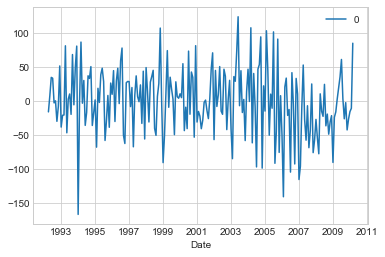

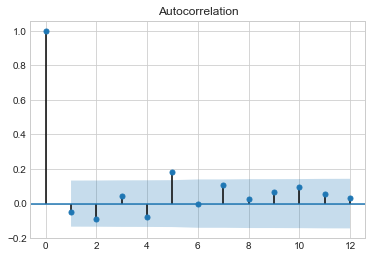

In [22]:
residuals = DataFrame(res.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=12)
pyplot.show()

In [23]:
df['lag5_dhomes'] = df['dhomes'].shift(5)
df['lag3_dirate'] = df['dirate'].shift(3)

In [24]:
df=df.dropna()

In [25]:
df.head()

,homes,irate,dhomes,dirate,lag1_dhomes,lag1_dirate,lag2_dirate,lag5_dhomes,lag3_dirate
Date,,,,,,,,,
1992-09,650,7.92,14.0,-0.06,9.0,-0.15,-0.38,-8.0,-0.16
1992-10,621,8.09,-29.0,0.17,14.0,-0.06,-0.15,8.0,-0.38
1992-11,614,8.31,-7.0,0.22,-29.0,0.17,-0.06,42.0,-0.15
1992-12,650,8.22,36.0,-0.09,-7.0,0.22,0.17,31.0,-0.06
1993-01,596,8.02,-54.0,-0.20,36.0,-0.09,0.22,9.0,0.17


In [26]:
X_multi1=df.drop(['homes','irate','dhomes','dirate', 'lag2_dirate'], axis=1)
Y_target1=df.dhomes

In [27]:
X_multi1=sm.tools.tools.add_constant(X_multi1, prepend=True, has_constant='skip')

                            OLS Regression Results                            
Dep. Variable:                 dhomes   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     13.19
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           1.38e-09
Time:                        12:30:38   Log-Likelihood:                -1112.1
No. Observations:                 211   AIC:                             2234.
Df Residuals:                     206   BIC:                             2251.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.1238      3.306     -0.945      

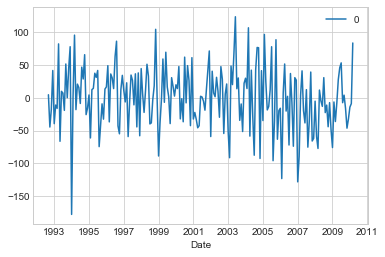

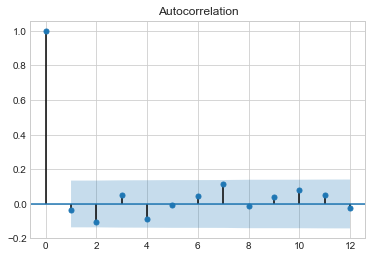

In [28]:
mod1 = sm.OLS(Y_target1, X_multi1)
res1 = mod1.fit()
print(res1.summary())
residuals1 = DataFrame(res1.resid)
residuals1.plot()
pyplot.show()
plot_acf(residuals1,lags=12)
pyplot.show()

In [29]:
#The model evaluation indicates that the second model is better. Nonetheless, as we add more lags our AIC and BIC decrease. On the second hand too many lags would result in  insignificant lags, which we do not have. The question now is if we want to add more lags and have decreased BIC. The second model is better

In [30]:
df.tail()

,homes,irate,dhomes,dirate,lag1_dhomes,lag1_dirate,lag2_dirate,lag5_dhomes,lag3_dirate
Date,,,,,,,,,
2009-11,362,4.88,-38.0,-0.07,9.0,-0.11,-0.13,28.0,-0.03
2009-12,353,4.93,-9.0,0.05,-38.0,-0.07,-0.11,20.0,-0.13
2010-01,338,5.03,-15.0,0.10,-9.0,0.05,-0.07,-11.0,-0.11
2010-02,324,4.99,-14.0,-0.04,-15.0,0.10,0.05,-17.0,-0.07
2010-03,411,4.97,87.0,-0.02,-14.0,-0.04,0.10,9.0,0.05


In [ ]:
#prediction for April DHOMES = -3.1238-0.3099*87-0.2095*38+63.4836*0.02-46.2998*0.1=-41.4064

In [31]:
data = pd.read_csv("sales.csv")

In [32]:
data.head()

,Year,Ad,S
0,1907,608,1016
1,1908,451,921
2,1909,529,934
3,1910,543,976
4,1911,525,930


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
Year    54 non-null int64
Ad      54 non-null int64
S       54 non-null int64
dtypes: int64(3)
memory usage: 1.3 KB


In [34]:
ts = pd.period_range('1907', periods=54, freq='Y')
data['Date'] = ts
data.set_index('Date',inplace=True)

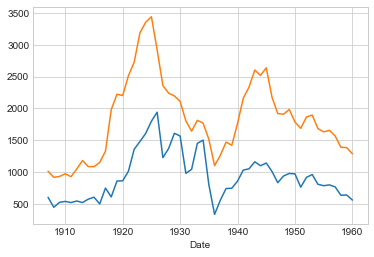

In [35]:
data['Ad'].plot() 
data['S'].plot() 
plt.show() #We see that they are non-stationary but we can check it just in case

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
result = adfuller(data.S, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.422391
p-value: 0.135516
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597


In [38]:
result = adfuller(data.Ad, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.391303
p-value: 0.144206
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599


In [39]:
#No we are sure they are not stationary. The next step is to check if they are cointegrated

In [40]:
smtools.coint(data['Ad'], data['S'], trend='ct', method='aeg', maxlag=1, autolag='aic', return_results=None)

(-3.6076165864115164,
 0.07727868123924578,
 array([-4.6316179 , -3.96431361, -3.63245968]))

In [41]:
#The test results show that Advertising expenses and sales are not cointegrated therefore we need to apply first difference ARDL model

In [42]:
data['dS'] = data['S'].diff(periods=1) 
data['lag_Ad1'] = data['Ad'].shift(1)

In [43]:
data.dropna(inplace=True)

In [44]:
X1_multi=data.drop(['S','dS', 'Year'], axis=1)
Y_target=data.dS

In [45]:
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')

                            OLS Regression Results                            
Dep. Variable:                     dS   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     15.91
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           4.51e-06
Time:                        12:30:44   Log-Likelihood:                -351.08
No. Observations:                  53   AIC:                             708.2
Df Residuals:                      50   BIC:                             714.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.0945     73.549      1.878      0.0

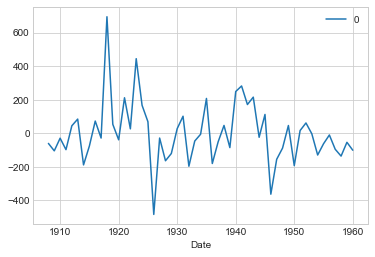

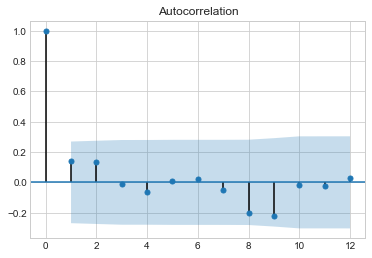

In [46]:
model = sm.OLS(Y_target, X1_multi)
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=12)
pyplot.show()

In [47]:
data['Ad'].autocorr(lag=1)

0.8205810537615361

In [48]:
data['Ad'].autocorr(lag=2)

0.6143887112318864

In [49]:
data['Ad'].autocorr(lag=3)

0.5491804569694697

In [50]:
data['Ad'].autocorr(lag=4)

0.5208149135956922

In [51]:
data['Ad'].autocorr(lag=5)

0.32562958395242886

In [52]:
data['Ad'].autocorr(lag=6)

0.1045310574225986

In [53]:
#We can also try to add lag5 to compare the models

In [54]:
data['lag_Ad5'] = data['Ad'].shift(5)

In [55]:
data.dropna(inplace=True)

In [56]:
X2_multi=data.drop(['S','dS', 'Year'], axis=1)
Y_target=data.dS

In [57]:
X2_multi=sm.tools.tools.add_constant(X2_multi, prepend=True, has_constant='skip')

                            OLS Regression Results                            
Dep. Variable:                     dS   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     12.44
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           5.08e-06
Time:                        12:30:48   Log-Likelihood:                -317.19
No. Observations:                  48   AIC:                             642.4
Df Residuals:                      44   BIC:                             649.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        258.8145     92.159      2.808      0.0

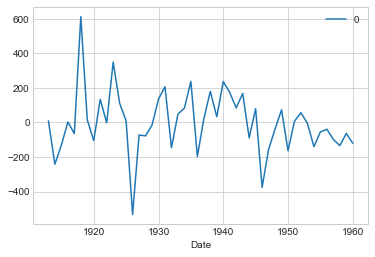

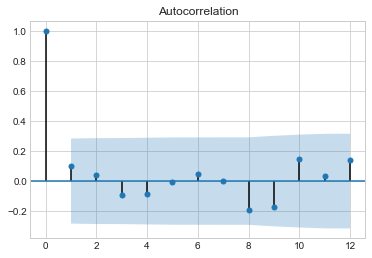

In [58]:
model = sm.OLS(Y_target, X2_multi)
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=12)
pyplot.show()

In [59]:
data.head()

,Year,Ad,S,dS,lag_Ad1,lag_Ad5
Date,,,,,,
1913,1913,525,1184,132.0,549.0,451.0
1914,1914,578,1089,-95.0,525.0,529.0
1915,1915,609,1087,-2.0,578.0,543.0
1916,1916,504,1154,67.0,609.0,525.0
1917,1917,752,1330,176.0,504.0,549.0


In [60]:
#both models are good, but the second model has lower AIC and BIC, also the second lag is significant so we can leave it there

In [61]:
data1=data.drop(['dS', 'Year', 'dS', 'lag_Ad1', 'lag_Ad5'], axis=1)

In [62]:
granger_test_result = sm.tsa.stattools.grangercausalitytests(data1, maxlag=12, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.6544 , p=0.0009  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=13.5172 , p=0.0002  , df=1
likelihood ratio test: chi2=11.8806 , p=0.0006  , df=1
parameter F test:         F=12.6544 , p=0.0009  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.3315  , p=0.0040  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=14.2073 , p=0.0008  , df=2
likelihood ratio test: chi2=12.3810 , p=0.0020  , df=2
parameter F test:         F=6.3315  , p=0.0040  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.7535  , p=0.0002  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=31.0980 , p=0.0000  , df=3
likelihood ratio test: chi2=23.6412 , p=0.0000  , df=3
parameter F test:         F=8.7535  , p=0.0002  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.5323  , p=0.0005  , df_d

In [63]:
#the test shows the lags are significant until 7th lag, which means they explain some variance and are in long-term relation with the dependent Sales variable. At the same time, we want to have as little lags as possible, that's why we are not going to go all the way until 7th